<a href="https://colab.research.google.com/github/Pravalikagivaji02/TimeSeries_Analysis/blob/main/DATA_ANALYSIS_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OBJECTIVE: PREDECTING THE GOLD PRICES IN THE MARKET OVER 10 YEARS**
![th.jpg](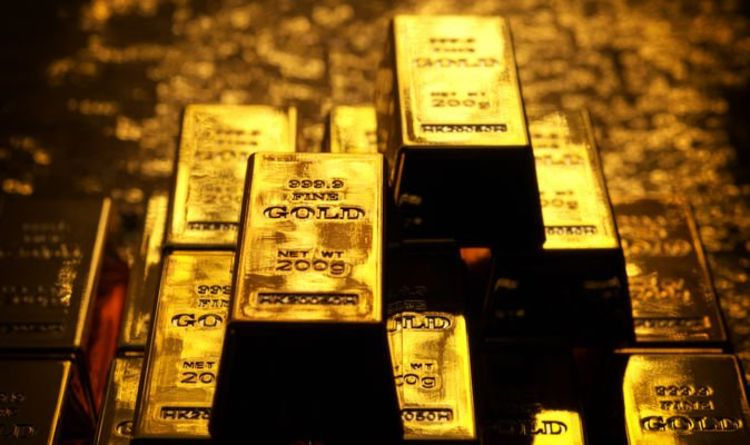)

In [ ]:
#Importing the Neccessaryb Libraries
import pandas as pd
import numpy as np

In [ ]:
#Reading the csv file or importing the dataset
data = pd.read_csv('/content/data.csv',index_col="date",parse_dates=True)

In [ ]:
#Reading the first rows and columns 
data.head()

,price
date,
1950-01-01,34.73
1950-02-01,34.73
1950-03-01,34.73
1950-04-01,34.73
1950-05-01,34.73


In [ ]:
#Reading the last rows and columns 
data.tail()

,price
date,
2017-10-01,1280.677
2017-11-01,1283.189
2017-12-01,1265.674
2018-01-01,1332.809
2018-02-01,1333.775


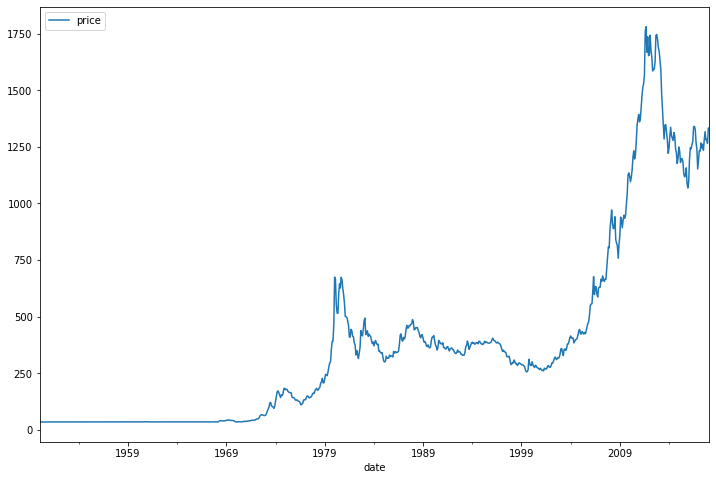

In [ ]:
#Importing the visualization library and plotting the graph 
import matplotlib.pyplot as plt
data.plot(figsize=(12,8))
#Returns the 60 years of gold prices

In [ ]:
#Let's add start Date with 2009 and predict till 2025
start_date = '2015-01-01'
end_date = '2025-01-01'
mask = (data.index >= start_date) & (data.index < end_date)
data = data.loc[mask]

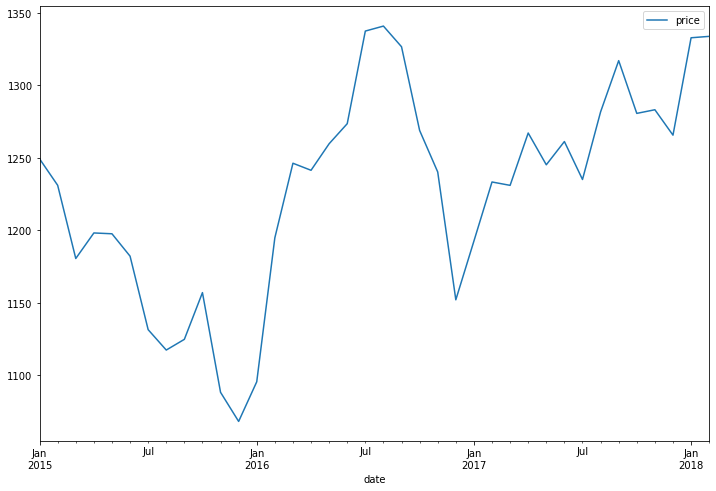

In [ ]:
#plotting the Graph of the future values
data.index.freq ='MS'
data.plot(figsize=(12,8))

In [ ]:
datayearly = data.rolling(window=12).mean()

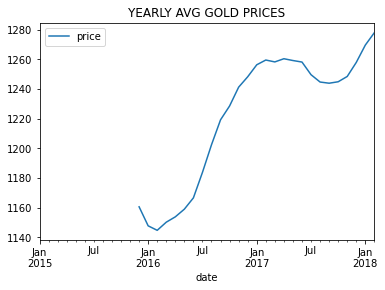

In [ ]:
datayearly.plot(title="YEARLY AVG GOLD PRICES")

# **FORECASTING THROUGH THE MODEL**

In [ ]:
#IMPORTING THE NECESSARY LIBRARIES
from statsmodels.tsa.stattools import adfuller

In [ ]:
#Now we are using the ad fuller test to test the staionarity andalso testing the unit root
def adf_test(series):
    result = adfuller(series,autolag='AIC')
    labels = ['ADF Test Statistic',"p value","#lags used","# observations"]
    out = pd.Series(result[0:4],index=labels)
    print(out.to_string())
    if result[1]<= 0.05:
       print('Reject the Null Hypothesis')
       print('Data has no unit root and stationary')
    else:
       print('Failto reject the null hypothesis')
       print('Date has a unit root and non-stationary')

In [ ]:
adf_test(data['price'])

ADF Test Statistic     -0.259757
p value                 0.931014
#lags used             11.000000
# observations        806.000000
Failto reject the null hypothesis
Date has a unit root and non-stationary


In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima import auto_arima
arima_fit = auto_arima(data['price'],start_P=0, start_Q = 0,max_P = 10,max_Q = 10,seasonal = False,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7473.359, Time=1.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7519.316, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7490.174, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7483.384, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7520.877, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7472.200, Time=0.83 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7480.323, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7473.990, Time=0.53 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=7479.049, Time=1.93 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=7481.375, Time=1.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7472.462, Time=2.07 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=7473.918, Time=4.13 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=7472.832, Time=1.02 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 14.669 seconds


# **BULIDING THE MODEL**

In [ ]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data['price'], order =(1,1,2))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
modelresults=model.fit()

In [ ]:
fcast = modelresults.predict(start = len(data),end = len(data)+24,typ=('levels'))
fcast = fcast.rename('ARIMA 0,1,0 Forecast')

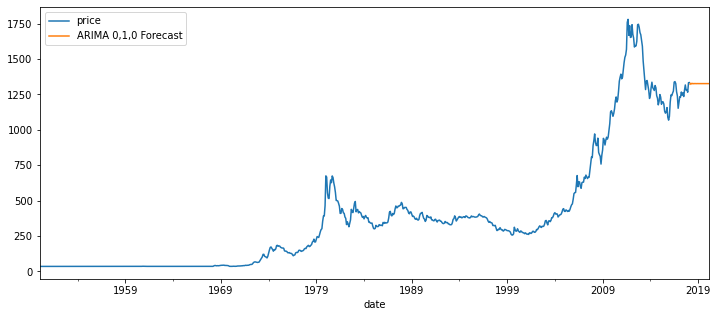

In [ ]:
data['price'].plot(figsize=(12,5),legend=True)
fcast.plot(legend = True)
#The orange lend is the forecasting the prices of gold in future.